In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 100000

In [3]:
factiva = pd.read_csv("data/FACTIVA_FINAL.csv")

In [4]:
# Remove columns with index
factiva1 = factiva.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [5]:
# Filter news tickers because DA is only mentioned once in chronology of events
factiva1_1 = factiva1[~factiva1['title'].str.contains("Newsblog|Ticker|Auf einen Blick|REG_K\n")]
print("Number of removed articles:",len(factiva1)-len(factiva1_1))
factiva1_2 = factiva1_1[~factiva1_1['body'].str.contains('News-Ticker')]
print("Number of removed articles:",len(factiva1_1)-len(factiva1_2))
# Remove Dschungelcamp ticker describing events in a given episode because DA is only briefly mentioned
factiva2 = factiva1_2[~factiva1_2['body'].str.contains('Dschungelcamp')]
print("Number of removed articles:",len(factiva1_2)-len(factiva2))

Number of removed articles: 13
Number of removed articles: 9
Number of removed articles: 1


In [6]:
print("Amount of articles:", len(factiva2))
print("Amount of articles to be labelled:", round(len(factiva2)*0.2))
print("Average length of articles:", factiva2.body.str.len().mean().round())
print("Median length of articles:", factiva2.body.str.len().median())
print("Length of longest article:", factiva2.body.str.len().max())
print("Length of shortest article:", factiva2.body.str.len().min())

Amount of articles: 2564
Amount of articles to be labelled: 513
Average length of articles: 3089.0
Median length of articles: 2242.0
Length of longest article: 18168
Length of shortest article: 89


Average reading time for 2500 words is: 8.33 . 
 For 512.8000000000001 , articles, we need 72.19 hours.


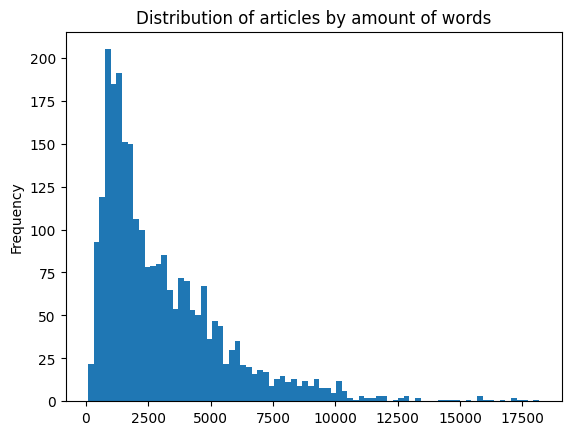

In [7]:
factiva2.body.str.len().plot.hist(bins = 80, title = 'Distribution of articles by amount of words')
avg_article_len = 2500
print("Average reading time for",avg_article_len,"words is:",round(avg_article_len/300, 2),". \n For",len(factiva2)*0.2,", articles, we need",round(520*round(avg_article_len/300, 2)/60, 2), "hours.")

In [8]:
print("Number of newspapers in this dataset:", factiva2['newspaper'].nunique(), "\n")
print("Number of articles by newspaper:\n", factiva2.groupby('newspaper').size().sort_values(ascending=False))

Number of newspapers in this dataset: 68 

Number of articles by newspaper:
 newspaper
Focus Online                                   332
Süddeutsche Zeitung                            162
Märkische Allgemeine Zeitung                   149
WELT online                                    119
Stuttgarter Zeitung                            119
Agence France Presse                           114
bild.de                                         99
Kölner Stadt-Anzeiger                           97
SDA - Schweizerische Depeschenagentur           85
Kurier Online                                   71
Basler Zeitung                                  66
Hamburger Abendblatt                            66
taz - die tageszeitung                          61
dpa-AFX ProFeed                                 58
ANSA Regional Service - Trentino Alto Adige     55
Neue Zürcher Zeitung                            47
Der Tagesspiegel                                46
AP Weltnachrichten                            

In [16]:
# turn back to list for processing
title = factiva2['title'].tolist()
body = factiva2['body']

In [15]:
factiva2.columns

Index(['title', 'body', 'date', 'newspaper'], dtype='object')

In [17]:
len(title)

2564